In [1]:
from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage

## Threshold segmentation Segmentation 

In [2]:
image = plt.imread('1.jpeg')
image.shape


(192, 263, 3)

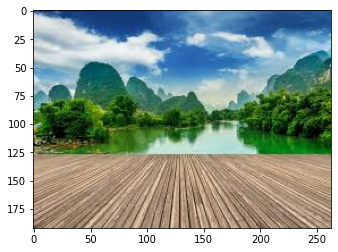

In [3]:
plt.imshow(image)

It is a three-channel image (RGB).

We need to convert it into grayscale so that we only have a single channel.
 
Doing this will also help us get a better understanding of how the algorithm works.

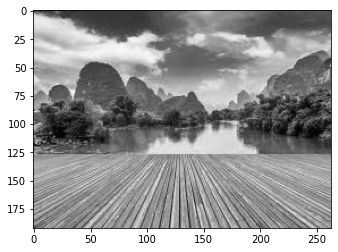

In [4]:
gray = rgb2gray(image)
plt.imshow(gray, cmap='gray')

In [5]:
gray.shape

(192, 263)

In this case, we can set a threshold value. The pixel values falling below or above that threshold can be classified accordingly (as an object or the background).<br> This technique is known as Threshold Segmentation.<br>

If we want to divide the image into two regions (object and background), we define a single threshold value. This is known as the global threshold.

The height and width of the image is 192 and 263 respectively.<br> We will take the mean of the pixel values and use that as a threshold.<br> If the pixel value is more than our threshold, we can say that it belongs to an object. If the pixel value is less than the threshold, it will be treated as the background.<br> Let’s code this:

In [6]:
# gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
# for i in range(gray_r.shape[0]):
#     if gray_r[i] > gray_r.mean():
#         gray_r[i] = 1
#     else:
#         gray_r[i] = 0
# gray = gray_r.reshape(gray.shape[0],gray.shape[1])
# plt.imshow(gray, cmap='gray')

 The darker region (black) represents the background and the brighter (white) region is the foreground.
<br>We can define multiple thresholds as well to detect multiple objects:

In [7]:
# gray = rgb2gray(image)
# gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
# for i in range(gray_r.shape[0]):
#     if gray_r[i] > gray_r.mean():
#         gray_r[i] = 3
#     elif gray_r[i] > 0.5:
#         gray_r[i] = 2
#     elif gray_r[i] > 0.25:
#         gray_r[i] = 1
#     else:
#         gray_r[i] = 0
# gray = gray_r.reshape(gray.shape[0],gray.shape[1])
# plt.imshow(gray, cmap='gray')

There are four different segments in the above image. You can set different threshold values and check how the segments are made. Some of the advantages of this method are:
<br>
Calculations are simpler<br>
Fast operation speed<br>
When the object and background have high contrast, this method performs really well<br>
But there are some limitations to this approach.<br> When we don’t have significant grayscale difference, or there is an overlap of the grayscale pixel values, it becomes very difficult to get accurate segments.

## Edge Detection Segmentation

**What divides two objects in an image?**
<br>There is always an edge between two adjacent regions with different grayscale values (pixel values).
<br>The edges can be considered as the discontinuous local features of an image.
<br>

We can make use of this discontinuity to detect edges and hence define a boundary of the object. This helps us in detecting the shapes of multiple objects present in a given image

<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2019/03/stride1.gif" width=400 height=200 />




## Image Segmentation based on Clustering

(535, 800, 3)


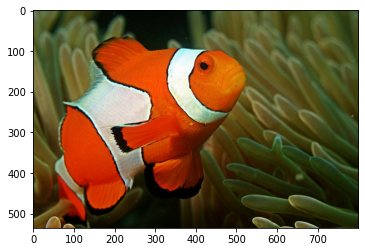

In [8]:
pic = plt.imread('Clownfish.jpeg')/255  # dividing by 255 to bring the pixel values between 0 and 1
print(pic.shape)
plt.imshow(pic)

It’s a 3-dimensional image of shape (192, 263, 3).<br> For clustering the image using k-means, we first need to convert it into a 2-dimensional array whose shape will be (length * width, channels).<br> In our example, this will be (192*263, 3).

In [9]:
pic_n = pic.reshape(pic.shape[0]*pic.shape[1], pic.shape[2])
pic_n.shape

(428000, 3)

In [10]:
pic_n

array([[0.42352941, 0.47843137, 0.34117647],
       [0.43137255, 0.48627451, 0.34901961],
       [0.43529412, 0.49019608, 0.34901961],
       ...,
       [0.12156863, 0.1372549 , 0.00784314],
       [0.12156863, 0.1372549 , 0.00784314],
       [0.11372549, 0.1372549 , 0.00392157]])

We can see that the image has been converted to a 2-dimensional array.
<br>Next, fit the k-means algorithm on this reshaped array and obtain the clusters. 
<br>The cluster_centers_ function of k-means will return the cluster centers and labels_ function will give us the label for each pixel (it will tell us which pixel of the image belongs to which cluster).

In [11]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(pic_n)
pic2show = kmeans.cluster_centers_[kmeans.labels_]

In [12]:
kmeans.cluster_centers_

array([[0.24950449, 0.24277352, 0.10018681],
       [0.80794497, 0.25543548, 0.02329415],
       [0.78815124, 0.82697684, 0.76753207]])

## these are the center pixels of the image that will label each cluster

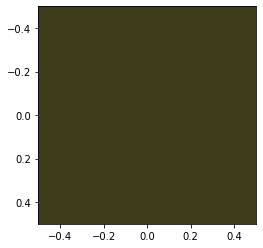

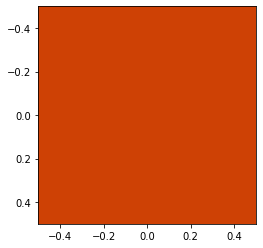

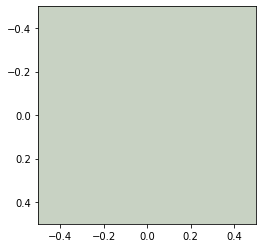

In [13]:
for i in range(0,3):
    plt.figure()
    plt.imshow([[kmeans.cluster_centers_[i]]]);

In [27]:
pic2show.shape

(428000, 3)

In [15]:
pic.shape[0]

535

In [16]:
pic.shape[1]

800

In [17]:
pic.shape[2]

3

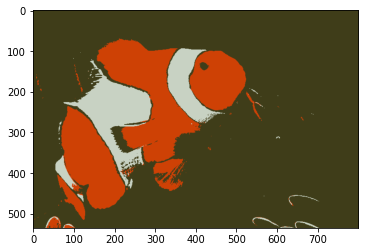

In [18]:
cluster_pic = pic2show.reshape(pic.shape[0], pic.shape[1], pic.shape[2])
plt.imshow(cluster_pic)

In [28]:
pic.shape

(192, 263, 3)

In [29]:
pic_n.shape

(428000, 3)

### putting all together 

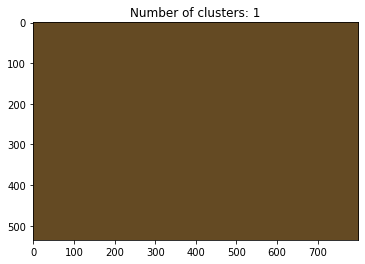

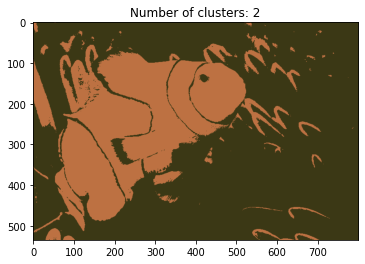

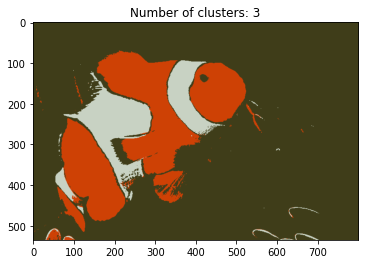

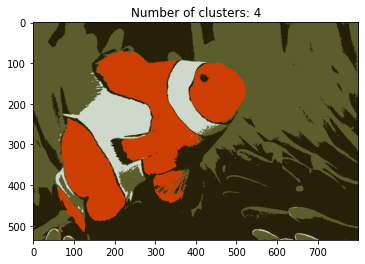

In [19]:
for i in range(1,5):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(pic_n)
    pic2show = kmeans.cluster_centers_[kmeans.labels_]
    cluster_pic = pic2show.reshape(pic.shape[0], pic.shape[1], pic.shape[2])
    plt.figure()
    plt.title("Number of clusters: "+str(i))
    plt.imshow(cluster_pic)

In [20]:
pic = plt.imread('1.jpeg')
pic

array([[[ 27,  64, 116],
        [ 55,  92, 144],
        [ 64, 101, 153],
        ...,
        [ 42,  92, 151],
        [ 42,  92, 151],
        [ 42,  92, 151]],

       [[ 40,  74, 120],
        [ 32,  69, 114],
        [ 40,  76, 124],
        ...,
        [ 39,  89, 148],
        [ 39,  89, 148],
        [ 38,  88, 147]],

       [[132, 161, 201],
        [ 94, 126, 165],
        [ 71, 103, 144],
        ...,
        [ 36,  86, 145],
        [ 34,  84, 143],
        [ 33,  83, 142]],

       ...,

       [[173, 146, 125],
        [171, 144, 123],
        [122,  95,  74],
        ...,
        [182, 160, 136],
        [161, 139, 115],
        [159, 137, 113]],

       [[149, 122, 101],
        [ 93,  66,  45],
        [ 96,  69,  48],
        ...,
        [205, 184, 157],
        [190, 169, 142],
        [183, 162, 135]],

       [[102,  75,  54],
        [ 95,  68,  47],
        [106,  79,  58],
        ...,
        [120,  99,  72],
        [153, 132, 105],
        [180, 159, 132]]

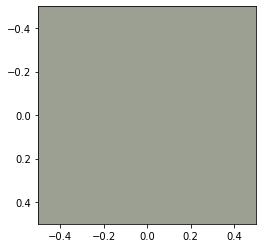

In [21]:
#Average color

R=[]
G=[]
B=[]
for i in pic:
    R.append(i[0][0])
    G.append(i[0][1])
    B.append(i[0][2])
v=[[[int(np.mean(R)),int(np.mean(G)),int(np.mean(B))]]]
import matplotlib.pyplot as plt
plt.imshow(v)
    

In [22]:
pic2show

array([[0.35946927, 0.36493125, 0.17759776],
       [0.35946927, 0.36493125, 0.17759776],
       [0.35946927, 0.36493125, 0.17759776],
       ...,
       [0.14520925, 0.12812109, 0.03093739],
       [0.14520925, 0.12812109, 0.03093739],
       [0.14520925, 0.12812109, 0.03093739]])

In [23]:
# making 3d image representation
x=[[
    
    [255,0,0],[0,255,0],[0,0,255]],
    [[120,7,5],[0,0,0],[0,22.8,25]
    
    ]]

In [24]:
import pandas as pd
pd.DataFrame(x)

,0,1,2
0,"[255, 0, 0]","[0, 255, 0]","[0, 0, 255]"
1,"[120, 7, 5]","[0, 0, 0]","[0, 22.8, 25]"


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


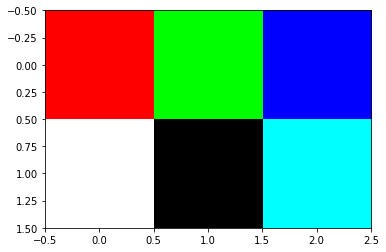

In [25]:
import matplotlib.pyplot as plt
plt.imshow(x)

## visualizing image in 3d plot

In [26]:
# import matplotlib.pyplot as plt
# from mpl_toolkits import mplot3d
# from PIL import Image
# im = Image.open("anim.jpeg")
# px = im.load()
# ax = plt.axes(projection = '3d')
# x = []
# y = []
# z = []
# c = []
# for row in range(0,im.height):
#      for col in range(0, im.width):
#          pix = px[col,row]
#          newCol = (pix[0] / 255, pix[1] / 255, pix[2] / 255)
         
#          if(not newCol in c):
#             x.append(pix[0])
#             y.append(pix[1])
#             z.append(pix[2])
#             c.append(newCol)
# ax.scatter(x,y,z, c = c)
# plt.show()